In [1]:
%matplotlib inline
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('final.csv')

In [2]:
x = df.loc[:,'Visitor-Points':'elo_diff'].values

In [3]:
y = df.loc[:,['score_gap_sign']].values

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=1/7.0, random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(.90)
pca.fit(train_x)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [7]:
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)

In [8]:
import glob, os
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
# run linear reg again
linreg = LinearRegression()
linreg.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
pred = linreg.predict(test_x)
error = np.sqrt(mean_squared_error(test_y, pred))
print(error)

12.14770259853811


In [11]:
# out-of-sample prediction of linear reg after PCA
out_of_sample = pd.read_csv('Out_of_Sample.csv')
X_out = out_of_sample.drop(['score_gap_sign'], axis = 1)
X_out = pca.transform(X_out)
x = pca.transform(x)
y_out = out_of_sample['score_gap_sign']
linreg.fit(x,y)
pred = linreg.predict(X_out)
error = np.sqrt(mean_squared_error(y_out, pred))
print(error)

14.828274827459133


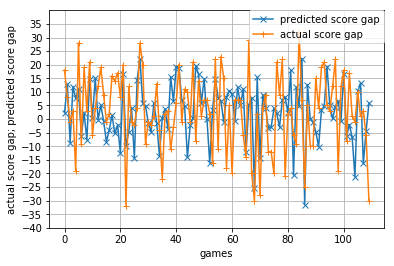

In [12]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('actual score gap; predicted score gap')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x,pred_list,"x-",label="predicted score gap")
plt.plot(x,y_out_list,"+-",label="actual score gap")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
plt.show()

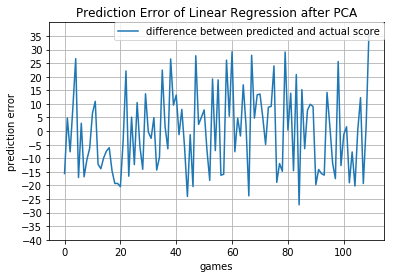

In [13]:
# Visulization of prediction 
import matplotlib.pyplot as plt
pred_list = list(pred)
y_out_list = list(y_out)
pred_actual_diff = [pred[i] - y_out[i] for i in range(len(pred))]
pred_actual_diff = [float(x) for x in pred_actual_diff]
fig, ax = plt.subplots()
plt.xlabel('games')
plt.ylabel('prediction error')
yticks = range(-40,40,5)
ax.set_yticks(yticks)
ax.set_ylim([-40,40])
x = list(range(len(out_of_sample)))
plt.plot(x, pred_actual_diff, label="difference between predicted and actual score")
plt.title("Prediction Error of Linear Regression after PCA")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)